In [1]:
import pandas as pd
import numpy as np
import glob

import os

from sklearn.metrics import cohen_kappa_score

from scipy.stats import spearmanr, kendalltau

In [2]:
import re

In [3]:
import matplotlib.pyplot as plt

In [4]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 200)
pd.options.display.float_format = '{:,.6f}'.format

In [5]:
ANNOTATIONS_FOLDER="anotações_humanas"

In [6]:
a1_df = pd.read_csv(os.path.join(ANNOTATIONS_FOLDER, "admin_240_annotations_with_questions.tsv"), sep='\t')

In [8]:
a2_df = pd.read_csv(os.path.join(ANNOTATIONS_FOLDER, "Eduardo_240_annotations_with_questions.tsv"), sep='\t')

In [9]:
a3_df = pd.read_csv(os.path.join(ANNOTATIONS_FOLDER, "Leodecio_240_annotations_with_questions.tsv"), sep='\t')

In [100]:
def check_agreement_per_questions(evaluation_a, evaluation_b, prefix=None):
    merged_df = evaluation_a.merge(evaluation_b, left_on='doccano_id', right_on='doccano_id')[['query_x', 'passage_x', 'passage_id_x', 'score_x', 'score_y']]
    
    correlations = []
    
    for group_name, group_df in merged_df.groupby('query_x', sort=False):
        correlations.append({'query': group_name,
                             'cohen_kappa{}'.format(prefix): cohen_kappa_score(group_df['score_x'], group_df['score_y'])})
        
    return merged_df, pd.DataFrame(correlations).fillna(1.0)

In [70]:
def plot_correlation_data_consolidated(correlation_df, columns_to_plot, plot_title):
    
    fig = plt.figure(figsize=[10, 10])

    fig.suptitle(plot_title, y=0.91)

    plt.grid()

    all_boxplots = plt.boxplot(correlation_df[columns_to_plot], patch_artist=True, vert=False, meanline=True, showmeans=True)

    colors = ['pink', 'lightblue', 'lightgreen']
    
    all_boxes = all_boxplots['boxes']
    
    print(all_boxes)
    
    for i, which_box in enumerate(all_boxes):
        which_box.set_facecolor(colors[i // 3])
    
    
    plt.yticks(range(1, len(columns_to_plot) + 1), columns_to_plot)
    plt.xticks(np.arange(-0.3, 1.0, 0.1))
    
    plt.legend(handles=all_boxes[::3], labels=["Humanos x Humanos", "Humanos x GPT3.5", "Humanos x GPT4"], bbox_to_anchor=(1.0, 1.0))

    plt.show()

In [160]:
def plot_correlation_data(correlation_df, columns_to_plot, plot_title):
    
    fig = plt.figure(figsize=[15, 40])

    fig.suptitle(plot_title, y=0.91)

    plt.grid()

    all_boxplots = plt.boxplot(correlation_df[columns_to_plot].to_numpy().transpose(), patch_artist=True, vert=False, meanline=True, showmeans=True)

    colors = ['pink', 'lightblue', 'lightgreen', 'lightyellow'][::-1]
    
    all_boxes = all_boxplots['boxes']
    
#     print(all_boxes)
    
    for i, which_box in enumerate(all_boxes):
        which_box.set_facecolor(colors[i % 4])

        
    
    plt.yticks(range(4, correlation_df.shape[0] + 1, 4), correlation_df.iloc[::4]['query'])
    plt.xticks(np.arange(-0.3, 1.0, 0.1))

    plt.show()

## Read the passage evaluations

In [16]:
gpt4_df = pd.read_csv(os.path.join(ANNOTATIONS_FOLDER, "gpt_4_evaluations_120_samples_2nd_round_with_questions.tsv"), sep='\t')

In [17]:
gpt4_1st_n5_df = pd.read_csv(os.path.join(ANNOTATIONS_FOLDER, "gpt_4_evaluations_120_samples_1st_queries_set_prompt_v2.1_05_completions.tsv"), sep='\t')

In [18]:
gpt4_2nd_n5_df = pd.read_csv(os.path.join(ANNOTATIONS_FOLDER, "gpt_4_evaluations_120_samples_2nd_queries_set_prompt_v2.1_05_completions.tsv"), sep='\t')

In [27]:
gpt4_n5_df = pd.concat([gpt4_1st_n5_df, gpt4_2nd_n5_df], axis=0).reset_index(drop=True)

In [32]:
gpt4_n5_df.to_csv(os.path.join(ANNOTATIONS_FOLDER, "gpt_4_evaluations_240_samples_prompt_v2.1_05_completions.tsv"), sep='\t', index=False)

In [28]:
gpt4_1st_n10_df = pd.read_csv(os.path.join(ANNOTATIONS_FOLDER, "gpt_4_evaluations_120_samples_1st_queries_set_prompt_v2.1_10_completions.tsv"), sep='\t')

In [29]:
gpt4_2nd_n10_df = pd.read_csv(os.path.join(ANNOTATIONS_FOLDER, "gpt_4_evaluations_120_samples_2nd_queries_set_prompt_v2.1_10_completions.tsv"), sep='\t')

In [30]:
gpt4_n10_df = pd.concat([gpt4_1st_n10_df, gpt4_2nd_n10_df], axis=0).reset_index(drop=True)

In [33]:
gpt4_n10_df.to_csv(os.path.join(ANNOTATIONS_FOLDER, "gpt_4_evaluations_240_samples_prompt_v2.1_10_completions.tsv"), sep='\t', index=False)

# Check general agreement per annotator / LLM generation

In [184]:
print(cohen_kappa_score(a1_df['score'], a2_df['score']))
print(cohen_kappa_score(a1_df['score'], a3_df['score']))
print(cohen_kappa_score(a2_df['score'], a3_df['score']))

0.43688147563072066
0.42940239595595864
0.41045478546339453


In [185]:
print(cohen_kappa_score(a1_df['score'], gpt4_df['score']))
print(cohen_kappa_score(a2_df['score'], gpt4_df['score']))
print(cohen_kappa_score(a3_df['score'], gpt4_df['score']))

0.31813418411308547
0.2746090261717766
0.3551552533819303


In [186]:
print(cohen_kappa_score(a1_df['score'], gpt4_n5_df['score']))
print(cohen_kappa_score(a2_df['score'], gpt4_n5_df['score']))
print(cohen_kappa_score(a3_df['score'], gpt4_n5_df['score']))

0.286692827454896
0.24700671326735424
0.3352728965436983


In [187]:
print(cohen_kappa_score(a1_df['score'], gpt4_n10_df['score']))
print(cohen_kappa_score(a2_df['score'], gpt4_n10_df['score']))
print(cohen_kappa_score(a3_df['score'], gpt4_n10_df['score']))

0.30859837836582027
0.24838193332869374
0.31948124389903776


### Put the results in a single table

In [178]:
general_agreement_df = pd.DataFrame()

In [179]:
general_agreement_df['comparisson'] = ['a1', 'a2', 'a3']

In [182]:
general_agreement_df['a1'] = ["", cohen_kappa_score(a1_df['score'], a2_df['score']), cohen_kappa_score(a1_df['score'], a3_df['score'])]
general_agreement_df['a2'] = [cohen_kappa_score(a1_df['score'], a2_df['score']), "", cohen_kappa_score(a2_df['score'], a3_df['score'])]
general_agreement_df['a3'] = [cohen_kappa_score(a1_df['score'], a3_df['score']), cohen_kappa_score(a2_df['score'], a3_df['score']), ""]
general_agreement_df['GPT4'] = [cohen_kappa_score(a1_df['score'], gpt4_df['score']), cohen_kappa_score(a2_df['score'], gpt4_df['score']), cohen_kappa_score(a3_df['score'], gpt4_df['score'])]
general_agreement_df['GPT4 n5'] = [cohen_kappa_score(a1_df['score'], gpt4_n5_df['score']), cohen_kappa_score(a2_df['score'], gpt4_n5_df['score']), cohen_kappa_score(a3_df['score'], gpt4_n5_df['score'])]
general_agreement_df['GPT4 n10'] = [cohen_kappa_score(a1_df['score'], gpt4_n10_df['score']), cohen_kappa_score(a2_df['score'], gpt4_n10_df['score']), cohen_kappa_score(a3_df['score'], gpt4_n10_df['score'])]

In [183]:
general_agreement_df

,comparisson,a1,a2,a3,GPT4,GPT4 n5,GPT4 n10
0,a1,,0.436881,0.429402,0.318134,0.286693,0.308598
1,a2,0.436881,,0.410455,0.274609,0.247007,0.248382
2,a3,0.429402,0.410455,,0.355155,0.335273,0.319481


# Check agreement per question

In [101]:
res_a1_a2 = check_agreement_per_questions(a1_df, a2_df, "_a1_a2")
res_a1_a3 = check_agreement_per_questions(a1_df, a3_df, "_a1_a3")
res_a2_a3 = check_agreement_per_questions(a2_df, a3_df, "_a2_a3")

In [103]:
res_a1_gpt4 = check_agreement_per_questions(a1_df, gpt4_df, "_a1_gpt4")
res_a1_gpt4_n5 = check_agreement_per_questions(a1_df, gpt4_n5_df, "_a1_gpt4_n5")
res_a1_gpt4_n10 = check_agreement_per_questions(a1_df, gpt4_n10_df, "_a1_gpt4_n10")

In [104]:
res_a2_gpt4 = check_agreement_per_questions(a2_df, gpt4_df, "_a2_gpt4")
res_a2_gpt4_n5 = check_agreement_per_questions(a2_df, gpt4_n5_df, "_a2_gpt4_n5")
res_a2_gpt4_n10 = check_agreement_per_questions(a2_df, gpt4_n10_df, "_a2_gpt4_n10")

In [105]:
res_a3_gpt4 = check_agreement_per_questions(a3_df, gpt4_df, "_a3_gpt4")
res_a3_gpt4_n5 = check_agreement_per_questions(a3_df, gpt4_n5_df, "_a3_gpt4_n5")
res_a3_gpt4_n10 = check_agreement_per_questions(a3_df, gpt4_n10_df, "_a3_gpt4_n10")

In [107]:
human_combined_res = pd.concat([res_a1_a2[1], res_a1_a3[1].iloc[:, -1], res_a2_a3[1].iloc[:, -1]], axis=1)

In [133]:
human_combined_res['cohen_kappa_mean'] = human_combined_res.iloc[:, 1:].mean(axis=1)
human_combined_res['cohen_kappa_std'] = human_combined_res.iloc[:, 1:].std(axis=1)

In [108]:
human_gpt4_combined_res = pd.concat([res_a1_gpt4[1], res_a2_gpt4[1].iloc[:, -1], res_a3_gpt4[1].iloc[:, -1]], axis=1)

In [136]:
human_gpt4_combined_res['cohen_kappa_mean'] = human_gpt4_combined_res.iloc[:, 1:].mean(axis=1)
human_gpt4_combined_res['cohen_kappa_std'] = human_gpt4_combined_res.iloc[:, 1:].std(axis=1)

In [109]:
human_gpt4_n5_combined_res = pd.concat([res_a1_gpt4_n5[1], res_a2_gpt4_n5[1].iloc[:, -1], res_a3_gpt4_n5[1].iloc[:, -1]], axis=1)

In [137]:
human_gpt4_n5_combined_res['cohen_kappa_mean'] = human_gpt4_n5_combined_res.iloc[:, 1:].mean(axis=1)
human_gpt4_n5_combined_res['cohen_kappa_std'] = human_gpt4_n5_combined_res.iloc[:, 1:].std(axis=1)

In [110]:
human_gpt4_n10_combined_res = pd.concat([res_a1_gpt4_n10[1], res_a2_gpt4_n10[1].iloc[:, -1], res_a3_gpt4_n10[1].iloc[:, -1]], axis=1)

In [138]:
human_gpt4_n10_combined_res['cohen_kappa_mean'] = human_gpt4_n10_combined_res.iloc[:, 1:].mean(axis=1)
human_gpt4_n10_combined_res['cohen_kappa_std'] = human_gpt4_n10_combined_res.iloc[:, 1:].std(axis=1)

In [149]:
all_questions_comparisson_df = pd.concat([human_combined_res.iloc[:, [0, 5, 4]], 
                                          human_gpt4_combined_res.iloc[:, [4, 5]],
                                          human_gpt4_n5_combined_res.iloc[:, [4, 5]],
                                          human_gpt4_n10_combined_res.iloc[:, [4, 5]]], axis=1)

In [163]:
all_questions_comparisson_df.columns

Index(['query', 'human_mean', 'human_std', 'human_gpt4_mean', 'human_gpt4_std',
       'human_gpt4_n5_mean', 'human_gpt4_n5_std', 'human_gpt4_n10_mean',
       'human_gpt4_n10_std', 'max'],
      dtype='object')

In [164]:
all_questions_comparisson_df.columns=['query', 'human_human_mean', 'human_human_std', 'human_gpt4_mean', 'human_gpt4_std', 'human_gpt4_n5_mean', 'human_gpt4_n5_std', 'human_gpt4_n10_mean', 'human_gpt4_n10_std', 'max']

### Agreement per question comparisson

In [165]:
all_questions_comparisson_df

,query,human_human_mean,human_human_std,human_gpt4_mean,human_gpt4_std,human_gpt4_n5_mean,human_gpt4_n5_std,human_gpt4_n10_mean,human_gpt4_n10_std,max
0,Onde está localizada a Praça XV de Novembro?,0.376471,0.238651,0.199069,0.099777,0.118496,0.066792,0.359073,0.049143,human_mean
1,Qual foi a importância da usina de Volta Redonda RJ para a industrialização brasileira?,0.123488,0.139342,0.223788,0.129270,0.126869,0.242351,0.103443,0.227585,human_gpt4_mean
2,Qual o uso dos códigos SWIFT?,0.242669,0.355292,0.241456,0.170546,0.125635,0.105993,0.253133,0.194748,human_gpt4_n10_mean
3,"O que são os celulares ""mid-range""?",0.416849,0.217967,0.508861,0.234751,0.524456,0.233752,0.459469,0.121376,human_gpt4_n5_mean
4,Por que os países Guiana e Suriname não são filiados a Conmebol?,0.612782,0.093891,0.260783,0.120765,0.350862,0.060921,0.260831,0.013723,human_mean
5,quais os critérios de definição dos monumentos intitulados maravilhas do mundo moderno?,0.473065,0.086488,0.282342,0.131614,0.188034,0.030218,0.084079,0.042207,human_mean
6,Qual a maior torcida de futebol do Brasil?,0.516647,0.192961,0.537868,0.247216,0.328625,0.141888,0.218750,0.127578,human_gpt4_mean
7,Quando se realizou o plebiscito popular para definir o sistema político do Brasil?,0.200401,0.293408,0.000000,0.000000,-0.109766,0.079630,-0.109766,0.079630,human_mean
8,Como transformar uma cidade pacata em um polo turístico?,0.373312,0.150517,0.162976,0.106084,0.369321,0.134079,0.302098,0.080960,human_mean
9,Quais são os melhores parques nacionais de Portugal?,0.112687,0.353256,0.106945,0.333125,0.113846,0.191993,0.113846,0.191993,human_gpt4_n5_mean


In [166]:
all_questions_comparisson_df.iloc[:, [1, 3, 5, 7]].mean()

human_human_mean      0.293339
human_gpt4_mean       0.202799
human_gpt4_n5_mean    0.194699
human_gpt4_n10_mean   0.206529
dtype: float64

In [157]:
all_questions_comparisson_df['max'] = all_questions_comparisson_df.iloc[:, [1, 3, 5, 7]].idxmax(axis='columns')

In [159]:
np.unique(all_questions_comparisson_df['max'].to_numpy(), return_counts=True)

(array(['human_gpt4_mean', 'human_gpt4_n10_mean', 'human_gpt4_n5_mean',
        'human_mean'], dtype=object),
 array([ 4,  4,  4, 12]))

### Agreement per question per annotator / LLM generation

In [197]:
indexes = [
    np.repeat(human_combined_res['query'].to_numpy(), 3),
    np.tile(['a1', 'a2', 'a3'], 24)
]

In [228]:
comparisson_results_a1 = []
comparisson_results_a2 = []
comparisson_results_a3 = []

for i, row in human_combined_res.iterrows():
    comparisson_results_a1.append(None)
    comparisson_results_a1.append(row['cohen_kappa_a1_a2'])
    comparisson_results_a1.append(row['cohen_kappa_a1_a3'])
    
    comparisson_results_a2.append(row['cohen_kappa_a1_a2'])
    comparisson_results_a2.append(None)
    comparisson_results_a2.append(row['cohen_kappa_a2_a3'])    
    
    comparisson_results_a3.append(row['cohen_kappa_a1_a3'])
    comparisson_results_a3.append(row['cohen_kappa_a2_a3'])        
    comparisson_results_a3.append(None)

In [229]:
all_comparissons_per_question_df = pd.DataFrame(comparisson_results_a1, index=indexes, columns=['a1'])

In [230]:
all_comparissons_per_question_df['a2'] = comparisson_results_a2
all_comparissons_per_question_df['a3'] = comparisson_results_a3

In [231]:
comparisson_results_gpt4 = []
comparisson_results_gpt4_n5 = []
comparisson_results_gpt4_n10 = []

for i in range(human_gpt4_combined_res.shape[0]):
    comparisson_results_gpt4.append(human_gpt4_combined_res.iloc[i, 1])
    comparisson_results_gpt4.append(human_gpt4_combined_res.iloc[i, 2])
    comparisson_results_gpt4.append(human_gpt4_combined_res.iloc[i, 3])
    
    comparisson_results_gpt4_n5.append(human_gpt4_n5_combined_res.iloc[i, 1])
    comparisson_results_gpt4_n5.append(human_gpt4_n5_combined_res.iloc[i, 2])
    comparisson_results_gpt4_n5.append(human_gpt4_n5_combined_res.iloc[i, 3])

    comparisson_results_gpt4_n10.append(human_gpt4_n10_combined_res.iloc[i, 1])
    comparisson_results_gpt4_n10.append(human_gpt4_n10_combined_res.iloc[i, 2])
    comparisson_results_gpt4_n10.append(human_gpt4_n10_combined_res.iloc[i, 3])
                                    

In [232]:
all_comparissons_per_question_df['gpt4'] = comparisson_results_gpt4
all_comparissons_per_question_df['gpt4_n5'] = comparisson_results_gpt4_n5
all_comparissons_per_question_df['gpt4_n10'] = comparisson_results_gpt4_n10

In [241]:
all_comparissons_per_question_df['mean'] = all_comparissons_per_question_df.mean(axis=1)
all_comparissons_per_question_df['std'] = all_comparissons_per_question_df.std(axis=1)

In [242]:
all_comparissons_per_question_df

a1  \
Onde está localizada a Praça XV de Novembro?                                            a1       NaN   
                                                                                        a2  0.264706   
                                                                                        a3  0.305556   
Qual foi a importância da usina de Volta Redonda RJ para a industrialização brasileira? a1       NaN   
                                                                                        a2 -0.012658   
                                                                                        a3  0.264706   
Qual o uso dos códigos SWIFT?                                                           a1       NaN   
                                                                                        a2  0.615385   
                                                                                        a3  0.000000   
O que são os celulares "mid-range"?                                                     a1       NaN   
                                                                                        a2  0.508197   
                                                                                        a3  0.687500   
Por que os países Guiana e Suriname não são filiados a Conmebol?                        a1       NaN   
                                                                                        a2  0.836066   
                                                                                        a3  0.677419   
quais os critérios de definição dos monumentos intitulados maravilhas do mundo moderno? a1       NaN   
                                                                                        a2  0.701493   
                                                                                        a3  0.558824   
Qual a maior torcida de futebol do Brasil?                                              a1       NaN   
                                                                                        a2  0.807692   
                                                                                        a3  0.423077   
Quando se realizou o plebiscito popular para definir o sistema político do Brasil?      a1       NaN   
                                                                                        a2  0.000000   
                                                                                        a3  0.508197   
Como transformar uma cidade pacata em um polo turístico?                                a1       NaN   
                                                                                        a2  0.285714   
                                                                                        a3  0.473684   
Quais são os melhores parques nacionais de Portugal?                                    a1       NaN   
                                                                                        a2 -0.081081   
                                                                                        a3 -0.250000   
Quando foi criada a consolidação das leis trabalhistas no brasil?                       a1       NaN   
                                                                                        a2  0.583333   
                                                                                        a3  0.594595   
Quais partidos já ocuparam o cargo da presidência do Brasil?                            a1       NaN   
                                                                                        a2 -0.044776   
                                                                                        a3  0.850746   
Quando é o dia Mundial da Alimentação?                                                  a1       NaN   
                                                                                        a2  0.473684   
                                          

## Build boxplot comparing the correlations per question

In [112]:
all_combined = []

In [113]:
for i, row in human_combined_res.iterrows():
    all_combined.append({"query": row['query'],
                         "first": row['cohen_kappa_a1_a2'],
                         "second": row['cohen_kappa_a1_a3'],
                         "third": row['cohen_kappa_a2_a3'],
                         "type": "human_human"})
    
    all_combined.append({"query": human_gpt4_combined_res.iloc[i, 0],
                         "first": human_gpt4_combined_res.iloc[i, 1],
                         "second": human_gpt4_combined_res.iloc[i, 2],
                         "third": human_gpt4_combined_res.iloc[i, 3],
                         "type": "human_gpt4"})
    
    all_combined.append({"query": human_gpt4_n5_combined_res.iloc[i, 0],
                         "first": human_gpt4_n5_combined_res.iloc[i, 1],
                         "second": human_gpt4_n5_combined_res.iloc[i, 2],
                         "third": human_gpt4_n5_combined_res.iloc[i, 3],
                         "type": "human_gpt4_n5"})
    
    all_combined.append({"query": human_gpt4_n10_combined_res.iloc[i, 0],
                         "first": human_gpt4_n10_combined_res.iloc[i, 1],
                         "second": human_gpt4_n10_combined_res.iloc[i, 2],
                         "third": human_gpt4_n10_combined_res.iloc[i, 3],
                         "type": "human_gpt4_n10"})    

In [114]:
all_combined_df = pd.DataFrame(all_combined)

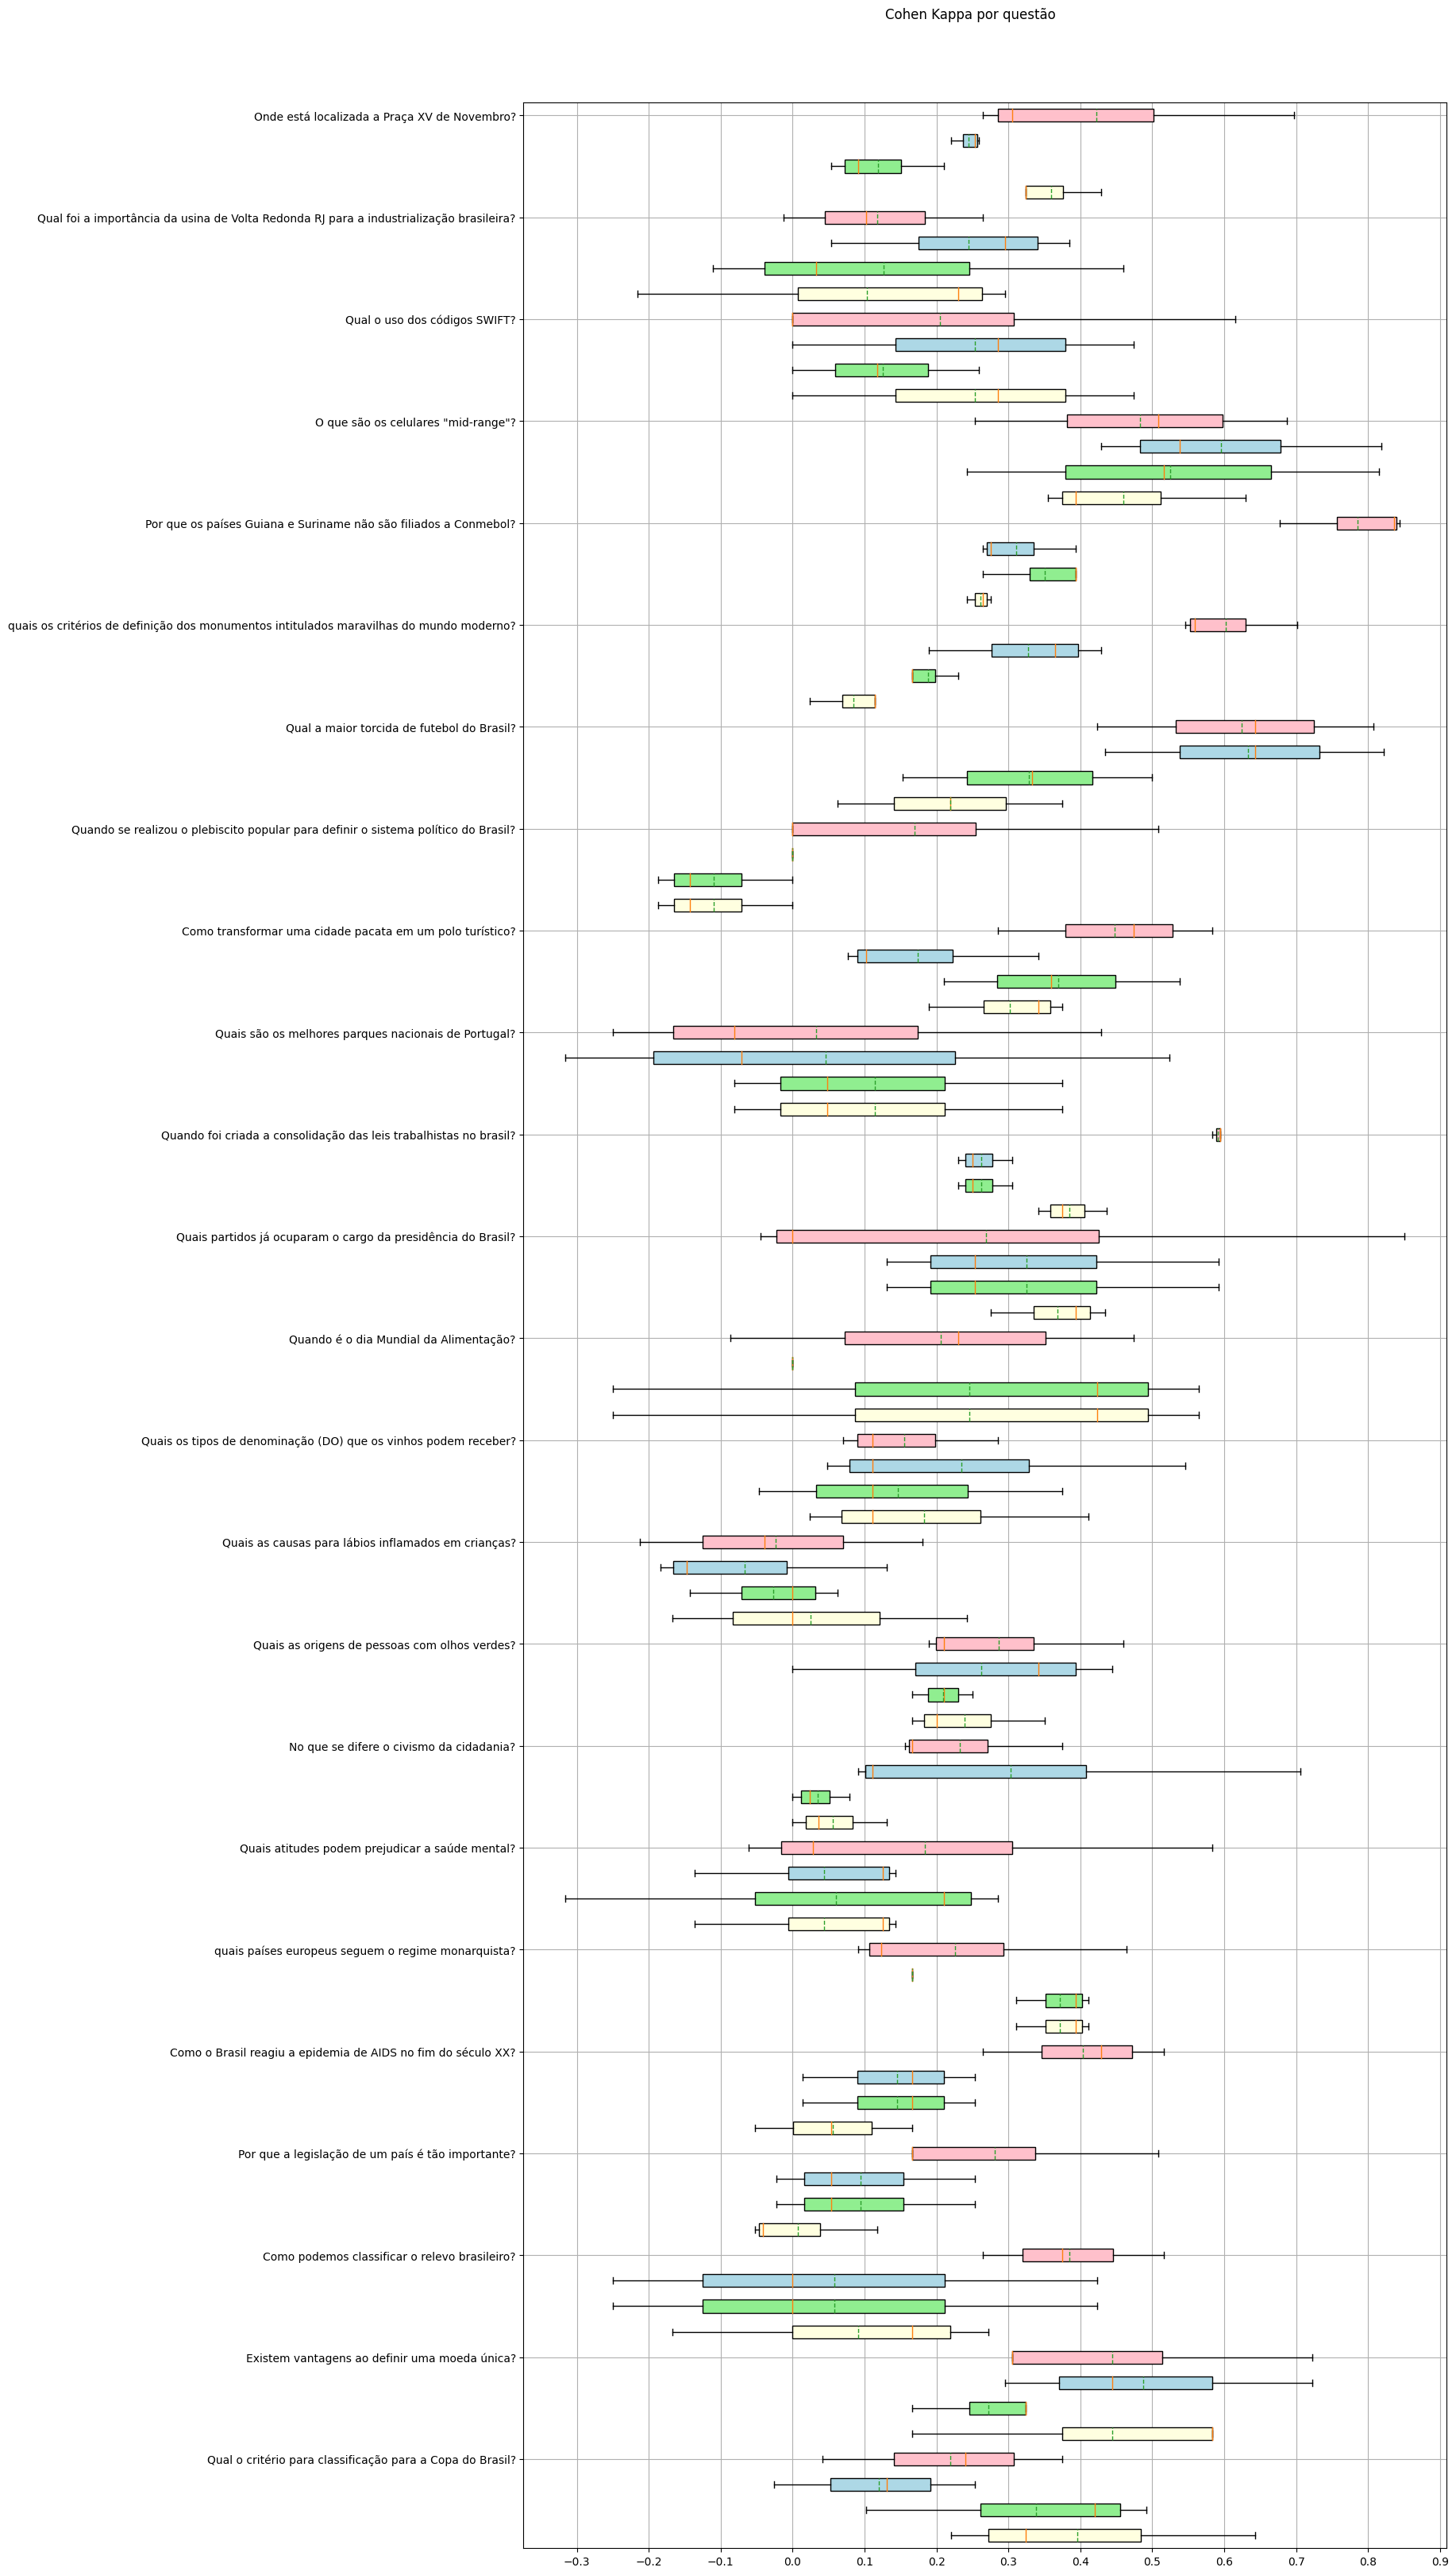

In [161]:
plot_correlation_data(all_combined_df.iloc[::-1], all_combined_df.columns[1:4], "Cohen Kappa por questão")